## **Imports** 

In [1]:
import numpy as np 
import Markovitz_reduction 
import results_annalysis

## **Markovitz energie** 

We will test with 3 assets to verify the reduction 

Defining the expected return vector and the covaraiance matrix (only an example )

In [2]:


# Expected returns
mu_A = 0.08
mu_B = 0.12
mu_C = 0.10
# Covariances
sigma_AA = 0.0004;sigma_AB = 0.0003;sigma_AC = 0.0002;sigma_BA = 0.0003;sigma_BB = 0.0005
sigma_BC = 0.0004;sigma_CA = 0.0002;sigma_CB = 0.0004;sigma_CC = 0.0006
# Expected return vector
expected_return_vector = np.array([mu_A, mu_B, mu_C])
Mu = expected_return_vector

# Covariance matrix
covariance_matrix = np.array([[sigma_AA, sigma_AB, sigma_AC],
                              [sigma_BA, sigma_BB, sigma_BC],
                              [sigma_CA, sigma_CB, sigma_CC]])
V = covariance_matrix



Defining the optimizing parameters

In [41]:
Lamda1 = 0.5
Lamda2 = 1
fraction = 100
step = 0.1
iteration = 1000
n_cond_init = 50
def temperature(self, t):
    tau = iteration/1
    # temp = 10*(1-np.exp(-1/tau*(t-1)))
    temp = 0.1*np.log(100*t)
    return 0.1
    # r = np.random.randint(0, 2)*2-1
    # return temp

def a(self, t):
    a0=0
    return 0
    if t<70:
        return 0.1*t
    else:
        return 7

def step_func(self, t):
    # return 1.01-np.exp(-0.01*(t-1))
    # return 1/t
    return 0.01

**The Markovitz problem**

In [42]:
markovitz = Markovitz_reduction.Markovitz(fraction,V, Mu, Lamda1, Lamda2, step, iteration, n_cond_init,temperature,a)

**Energies**

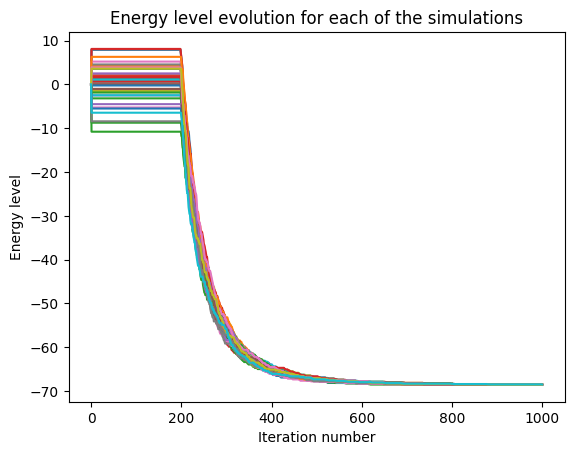

-68.58880068999999

In [43]:
states,energies = markovitz.SB_optimization(step_func, iteration, n_cond_init,temperature,a)
results_annalysis.plot_energies_evolution(energies)
results_annalysis.extract_full_solution(states, energies)[0]

In [44]:
print(np.shape(states))

(50, 297, 1000, 2)


In [45]:
print(states[0,:,-1,0])

[ 0.65932574 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         

In [52]:
S = states[40,:,-1,0]
C= np.zeros(len(S))
for i in range(len(S)): 
    if S[i]>=0: 
        C[i] = 1
    else: 
        C[i] = 0

print(S[0])
def P(fraction,n): 
    p = np.zeros((n,n*(fraction-1)))
    pp = np.array([i+1 for i in range(fraction -1 )])
    for i in range(n):
        start = i*(fraction-1)
        p[i,start:start+len(pp)] = pp
    return p/fraction
Choices = (S+1)/2
Weights = np.dot(P(fraction,3),C)
print(Weights)

-1.0
[0.   0.04 0.02]


 **Seeing the weights**

In [9]:

# H,J = markovitz.Reduction_to_Ising()
Weights = markovitz.Ising_to_Portfolio(step_func, iteration, n_cond_init,temperature,a)

In [10]:
print(Weights)

[0. 0. 0.]
